# Bases de Traitement d'Images : TP 6
# Transformée de Fourier 2D

## I. Définition

La transformation de Fourier convertit usuellement une information
temporelle en une information fréquentielle. Ainsi un signal réel de
durée infinie contenant une seule fréquence $f_0$ sera défini dans le
domaine fréquentiel par deux Diracs centrés en $\pm f_0$. La
transformation de Fourier inverse permet de retrouver cette sinusoïde à
partir des deux Diracs.

La transformation de Fourier peut s'étendre aux signaux à deux
dimensions selon : $$\begin{aligned}
    S(v_1,v_2) =
\int_{u_2=-\infty}^{+\infty}\int_{u_1=-\infty}^{+\infty}s(u_1,u_2)
e^{-2\pi j u_1 v_1}  e^{-2\pi j u_2 v_2} du_1 du_2 \nonumber\end{aligned}$$
Dans le cadre d'une image, $u_1$ et $u_2$ ont une dimension spatiale (en
$m$), tandis que $v_1$ et $v_2$ sont des fréquences spatiales (en
$m^{-1}$).

Les images étant échantillonnées, nous utilisons une TF 2D discrète,
avec les mêmes caractéristiques de périodicité et de repliement spectral
connues dans la TFD. $$\begin{aligned}
    S[k,l] = \sum_{m=0}^{M-1} \sum_{n=0}^{N-1} s[n,m] e^{- 2\pi
j\left(\frac{nk}{N} +\frac{ml}{M}\right) } \nonumber\end{aligned}$$ Avec
$N\times M$ la taille de l'image. Comme dans une TFD classique, on peut
faire du bourrage de zéros (*zero padding*), indépendamment selon les
deux dimensions spatiales.

On visualise classiquement le spectre, c'est-à-dire le module carré de
la TF 2D, et souvent sur une échelle logarithmique. Tout comme la TF ne
contient que des informations fréquentielles et aucune information
temporelle, la TF 2D d'une image ne contient pas d'information de
localisation des différentes fréquences.\
Quelques exemples :

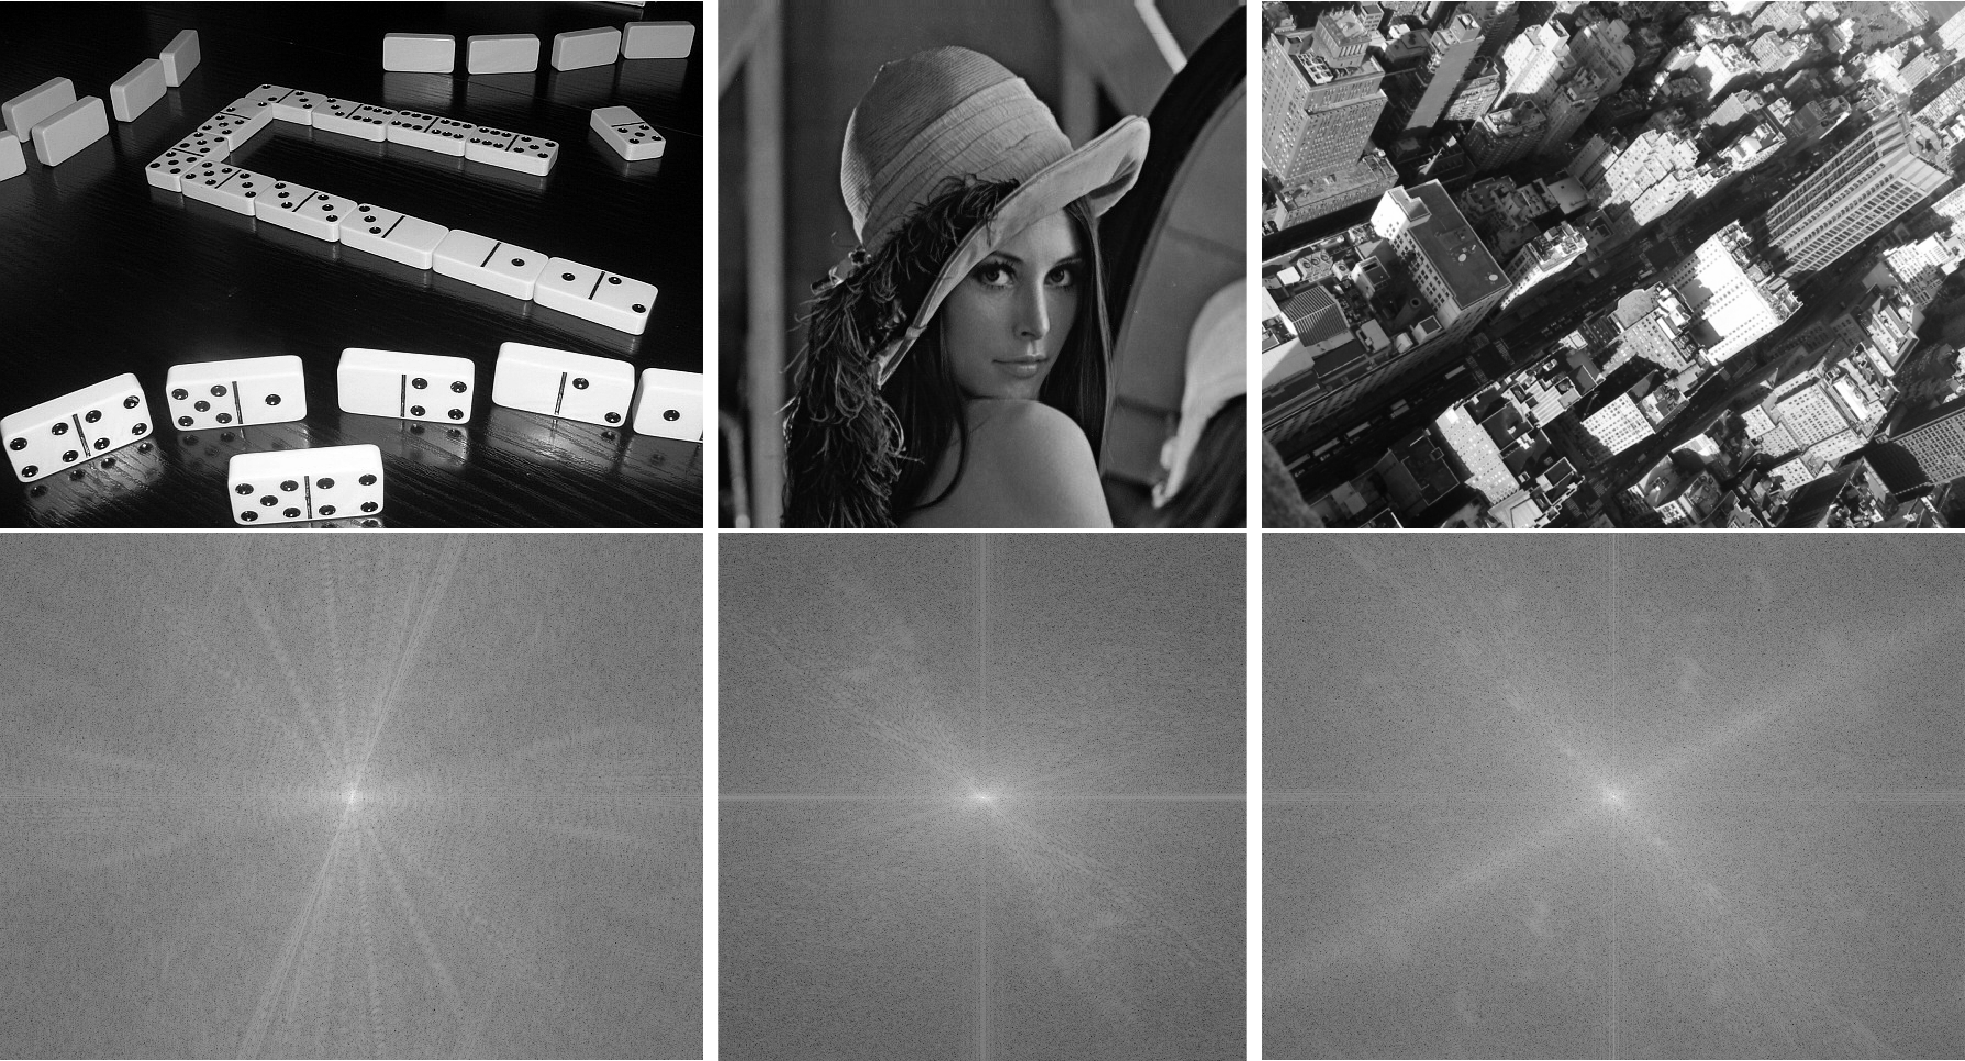

## II. Applications

1.  À l'aide des fonctions *np.fft.fft2* et *np.fft.fftshift*, calculez
    puis affichez les spectres de Fourier des images « sinus.png »,
    « creneau.png », « grille.png » et « cameraman.tif ».

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from scipy import signal, ndimage


In [3]:
plt.rcParams['image.cmap'] = 'gray'


sinus = plt.imread("sinus.png")
creneau = plt.imread("creneau.png")
grille = plt.imread("grille.png")
cerveau = plt.imread("irm_cerveau.JPG")

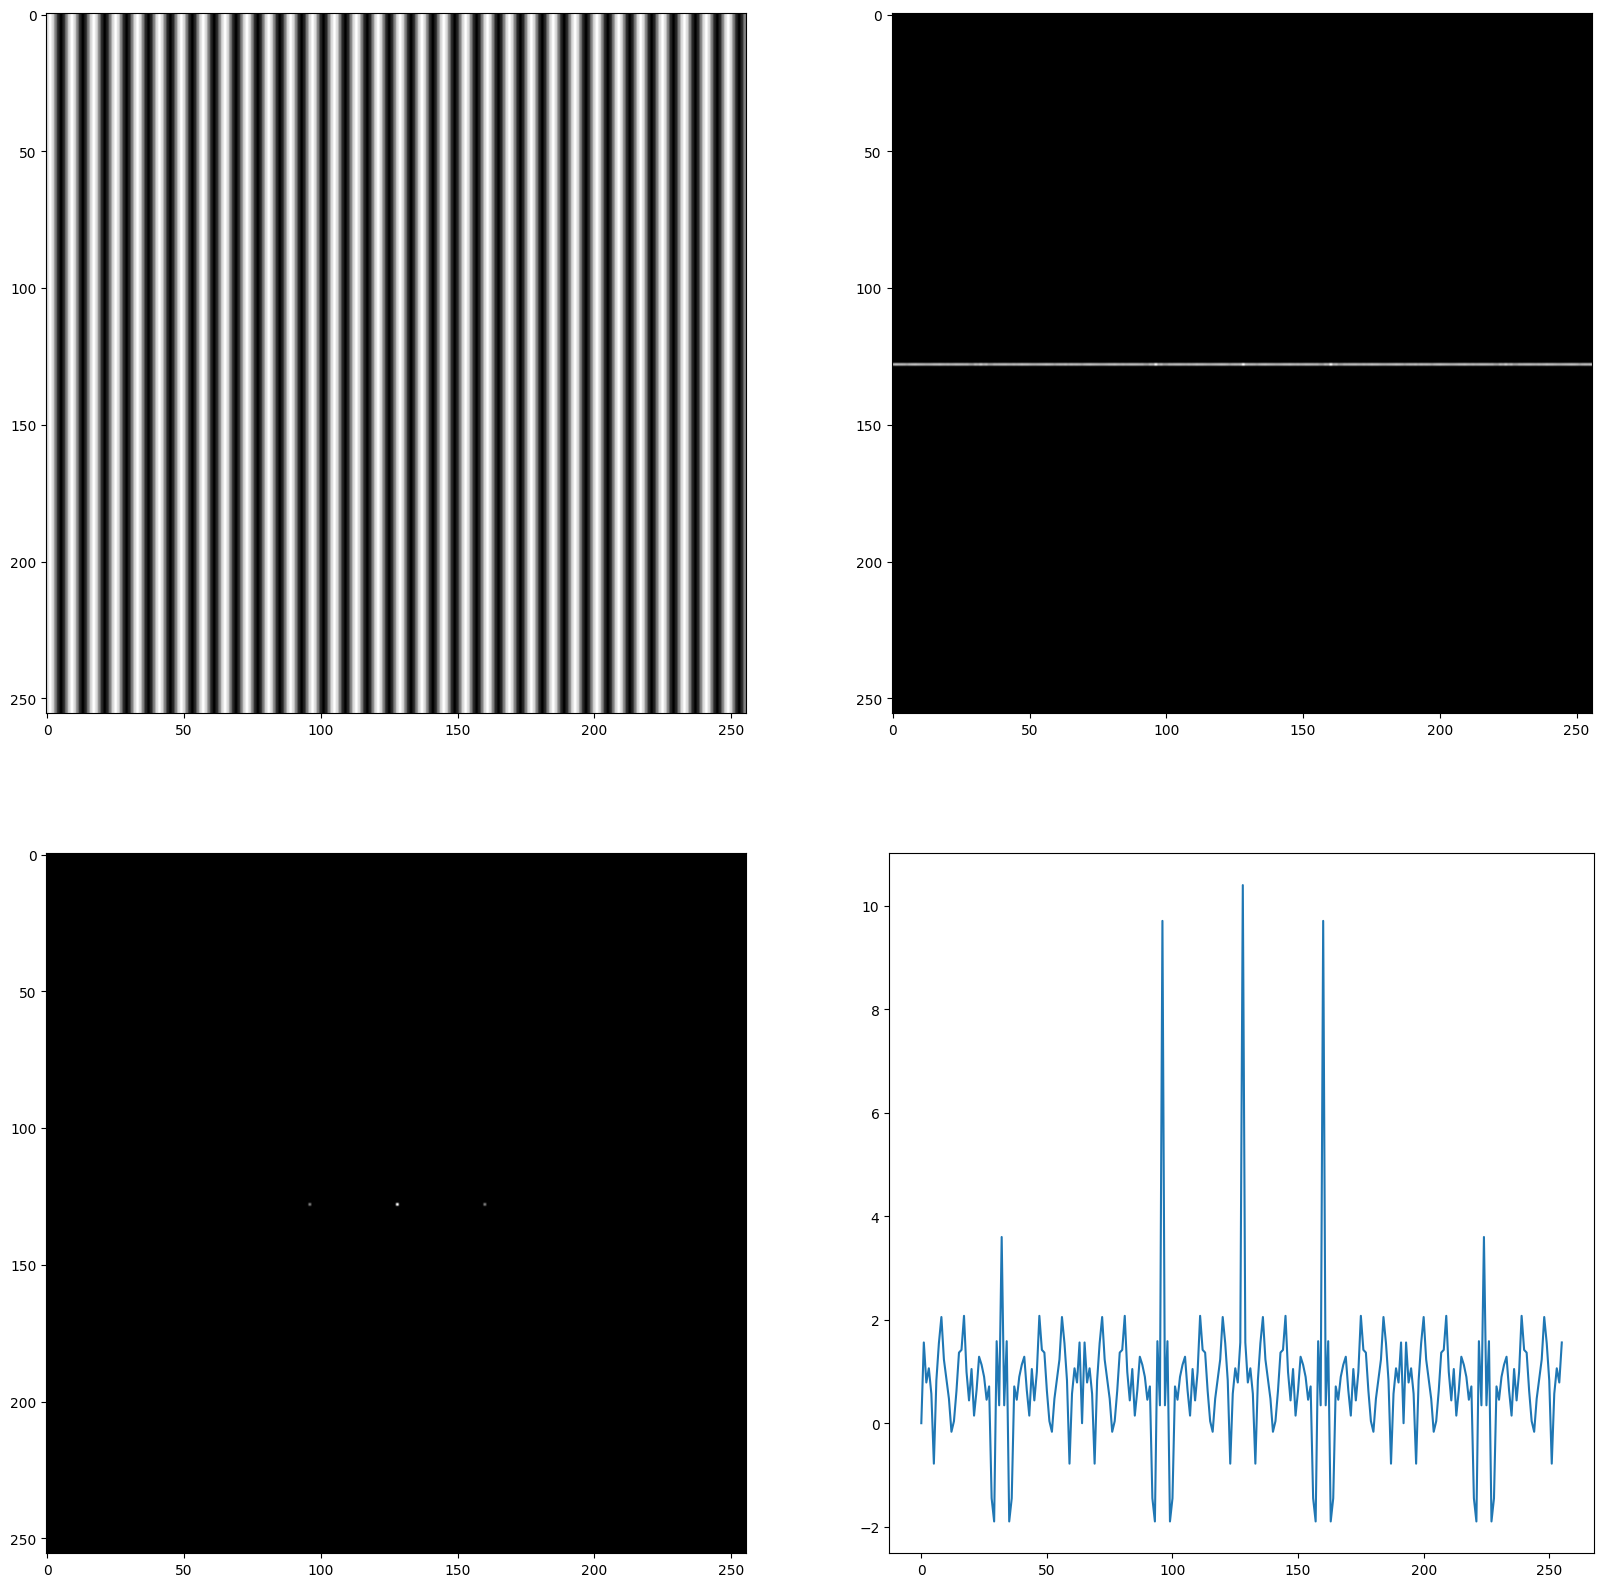

In [4]:

def TF(x) : 
    f = np.fft.fftshift(np.fft.fft2(x))
    return f, np.log(np.abs(f)+1e-10) #Le log permet d'afficher des valeurs que l'echelle normale n'afficherait pas

sinus_f,fft_sinus = TF(sinus)
creneau_f,fft_creneau = TF(creneau)
grille_f,fft_grille = TF(grille)
cerveau_f,fft_cerveau = TF(cerveau)

plt.figure(figsize=(20,20))
plt.subplot(221)
plt.imshow(sinus)

plt.subplot(222)
plt.imshow(fft_sinus)

plt.subplot(223)
plt.imshow(np.abs(sinus_f))

plt.subplot(224)
plt.plot(fft_sinus[128])

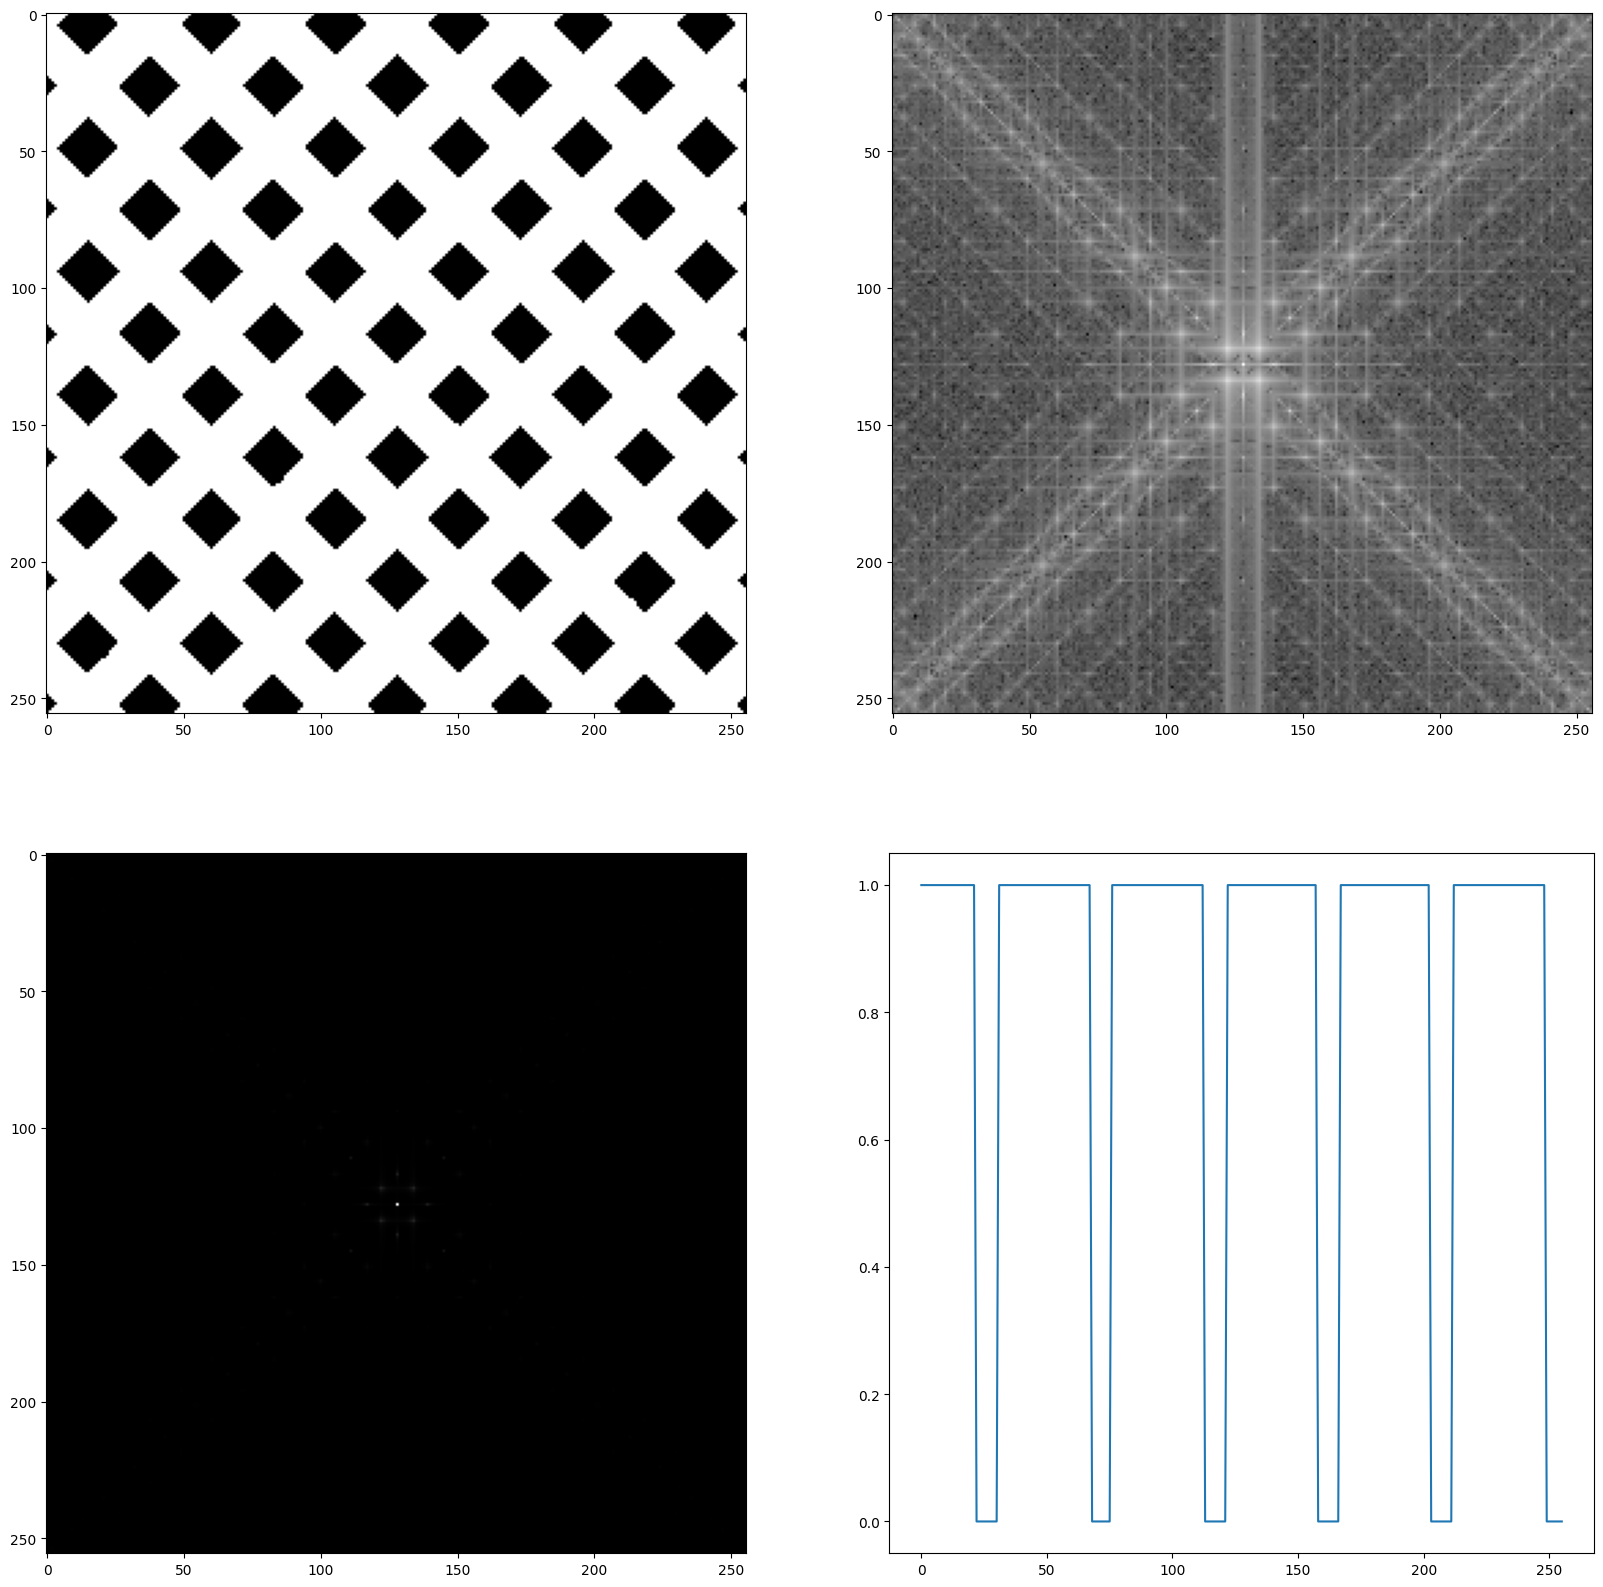

In [5]:
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.imshow(grille)

plt.subplot(222)
plt.imshow(fft_grille)

plt.subplot(223)
plt.imshow(np.abs(grille_f))

plt.subplot(224)
plt.plot(grille[:,121])

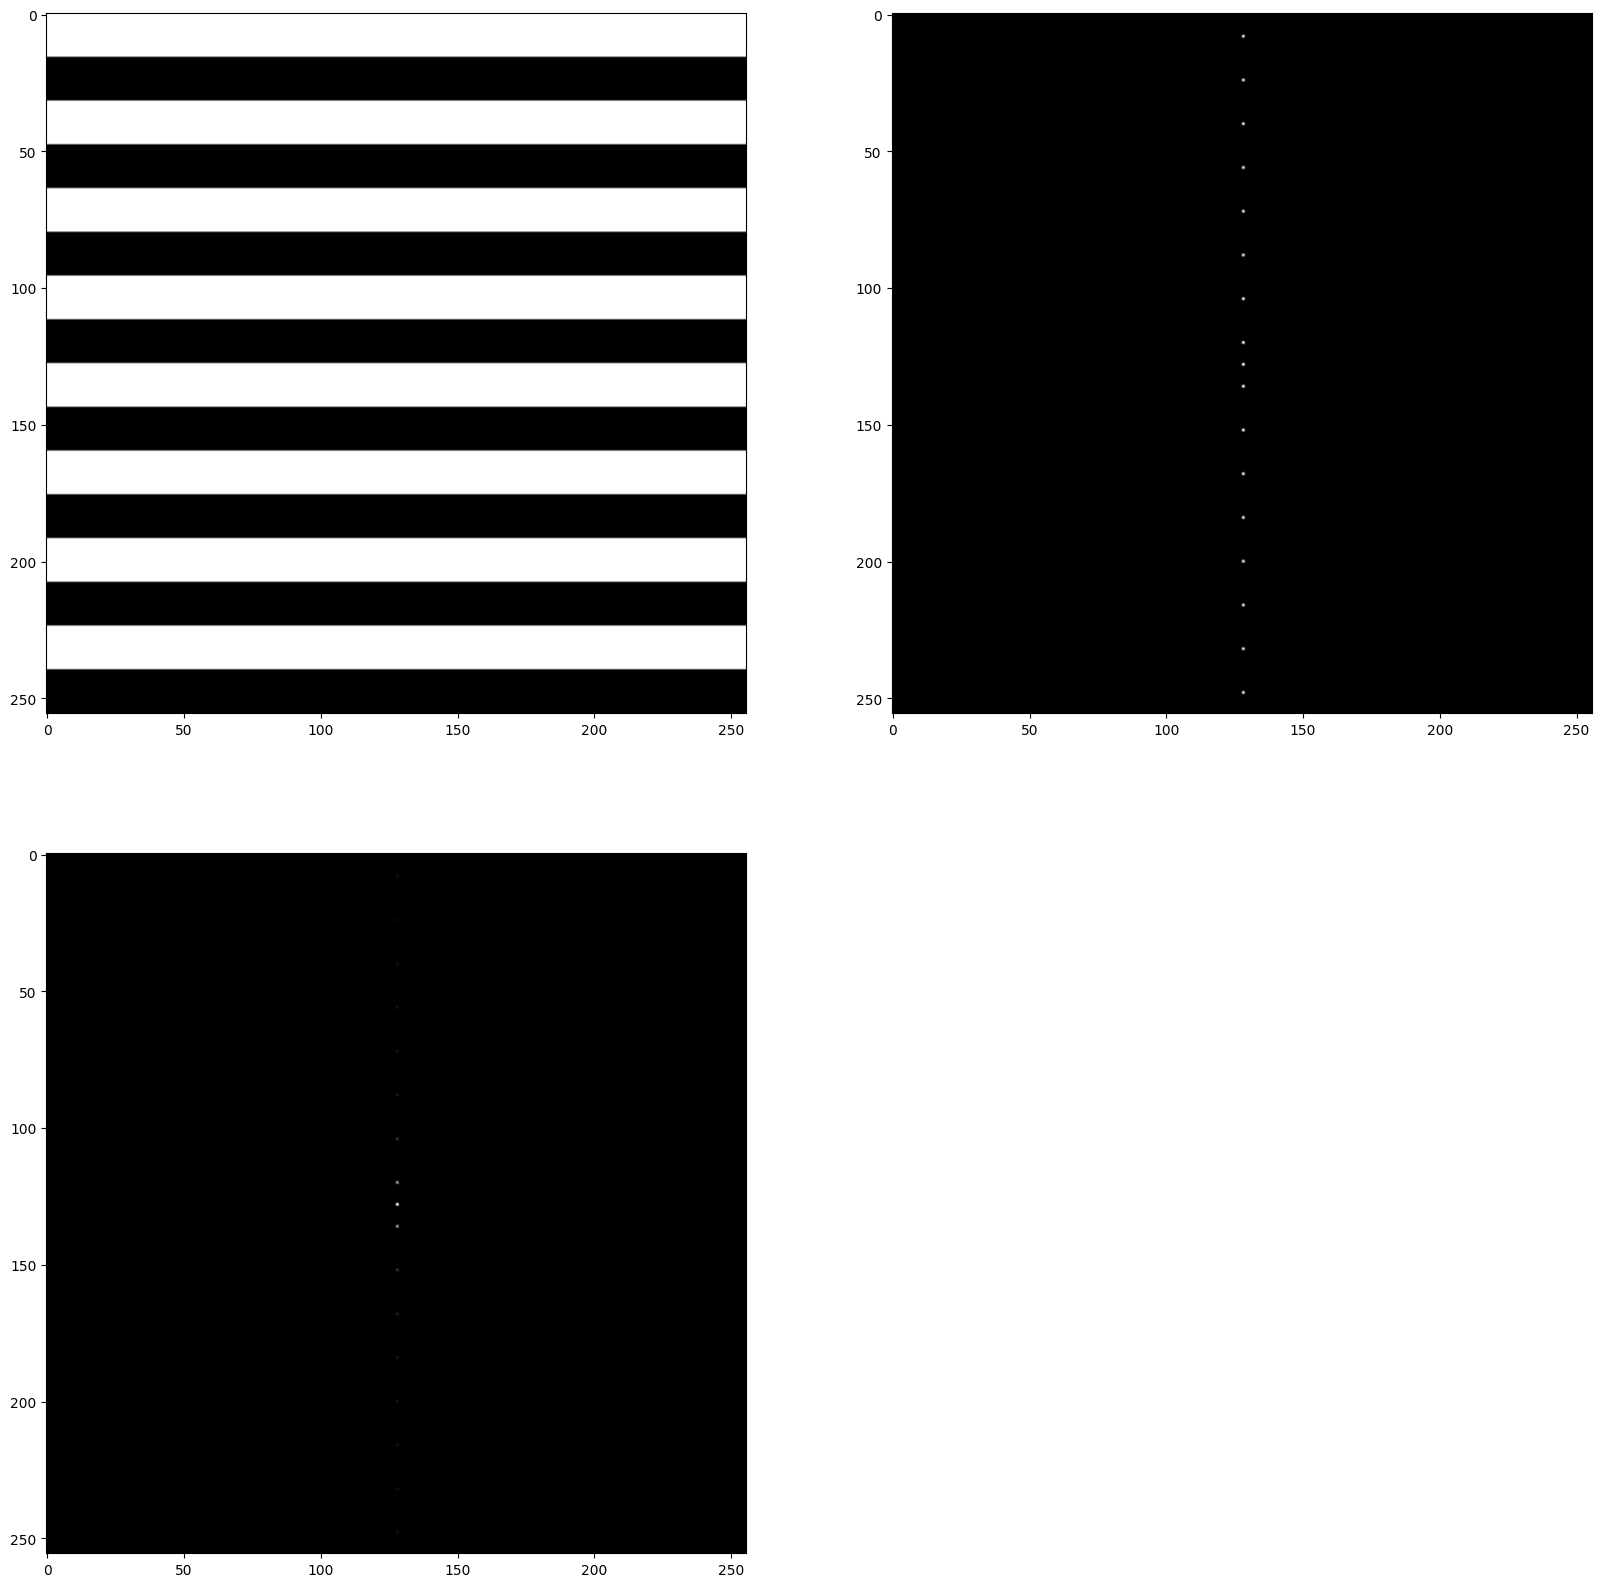

In [6]:
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.imshow(creneau)

plt.subplot(222)
plt.imshow(fft_creneau)

plt.subplot(223)
plt.imshow(np.abs(creneau_f))

# plt.subplot(224)
# plt.plot(fft_creneau[128])

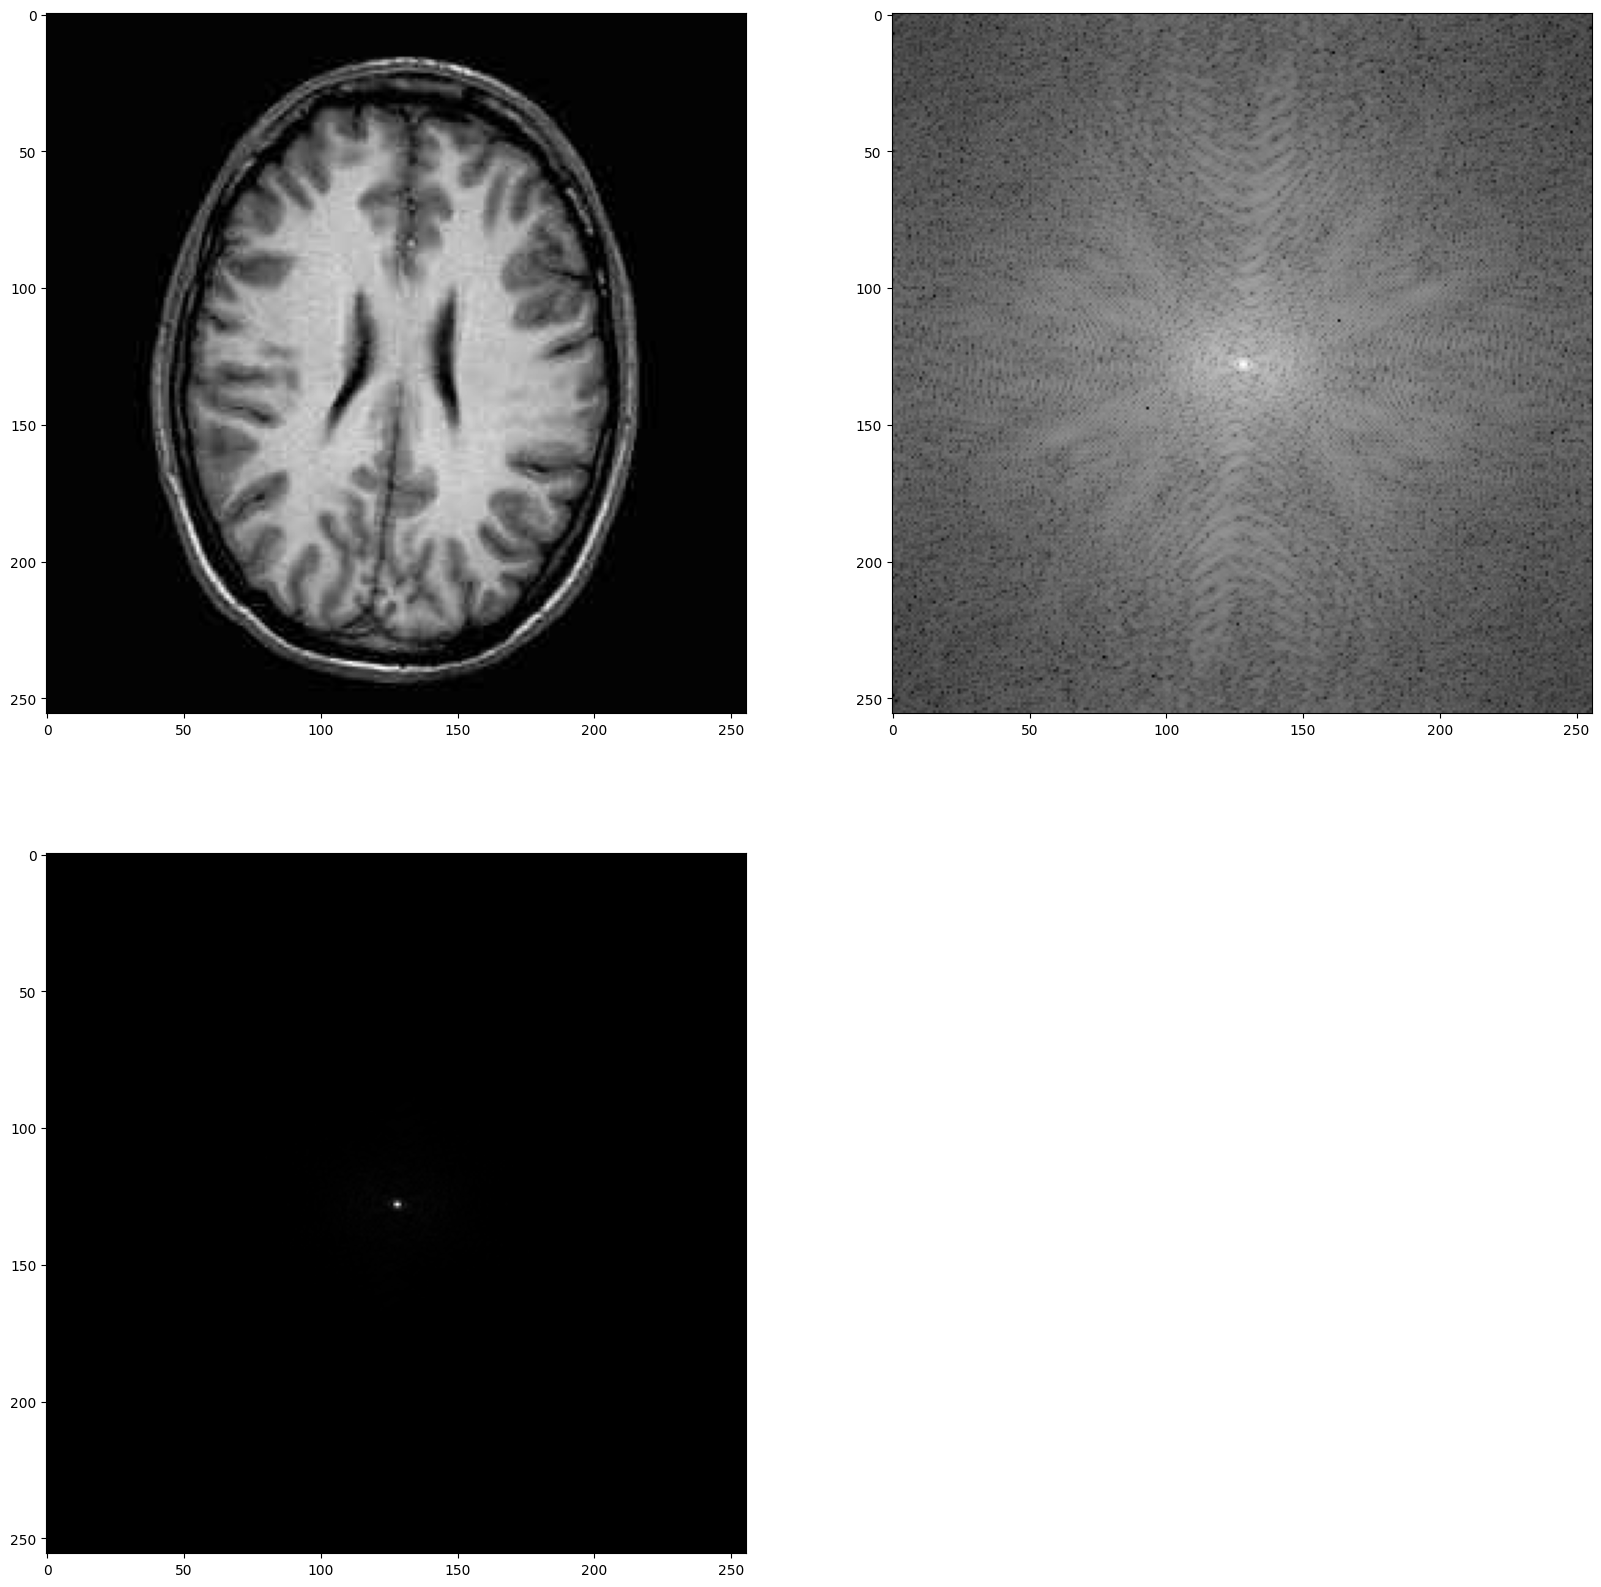

In [7]:
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.imshow(cerveau)

plt.subplot(222)
plt.imshow(fft_cerveau)


plt.subplot(223)
plt.imshow(np.abs(cerveau_f))

# plt.subplot(224)
# plt.plot(fft_sinus[128])

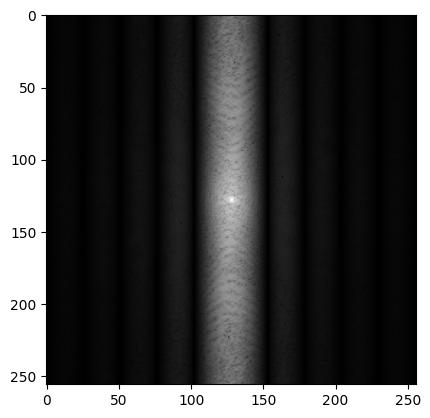

In [28]:
x = np.linspace(-5,5,np.size(fft_cerveau,1))

p = np.abs(np.sinc(x))

t = fft_cerveau*p

plt.figure()
plt.imshow(t)

# plt.plot(x,p)



## III. Filtrage fréquentiel

Précédemment, nous avons vu comment filtrer à l'aide de la convolution,
afin d'obtenir des versions basses fréquences de l'image (filtres
moyenneurs) ou hautes fréquences (détection des contours).

Il est également possible de modifier la TF d'une image et d'effectuer
la transformée inverse afin d'obtenir une image filtrée. Un filtre
passe-bas conserve le centre de la TF 2D et supprime les bords, tandis
qu'un filtre passe-haut supprime le centre de la TF 2D mais conserve ses
bordes.

Il est également possible de définir un filtre passe-bande.

## IV. Applications

1.  Ouvrez l'image « irm$\_$cerveau.jpg ». Calculez et affichez son
    spectre de Fourier.

Text(0.5, 1.0, 'FFT en echelle log')

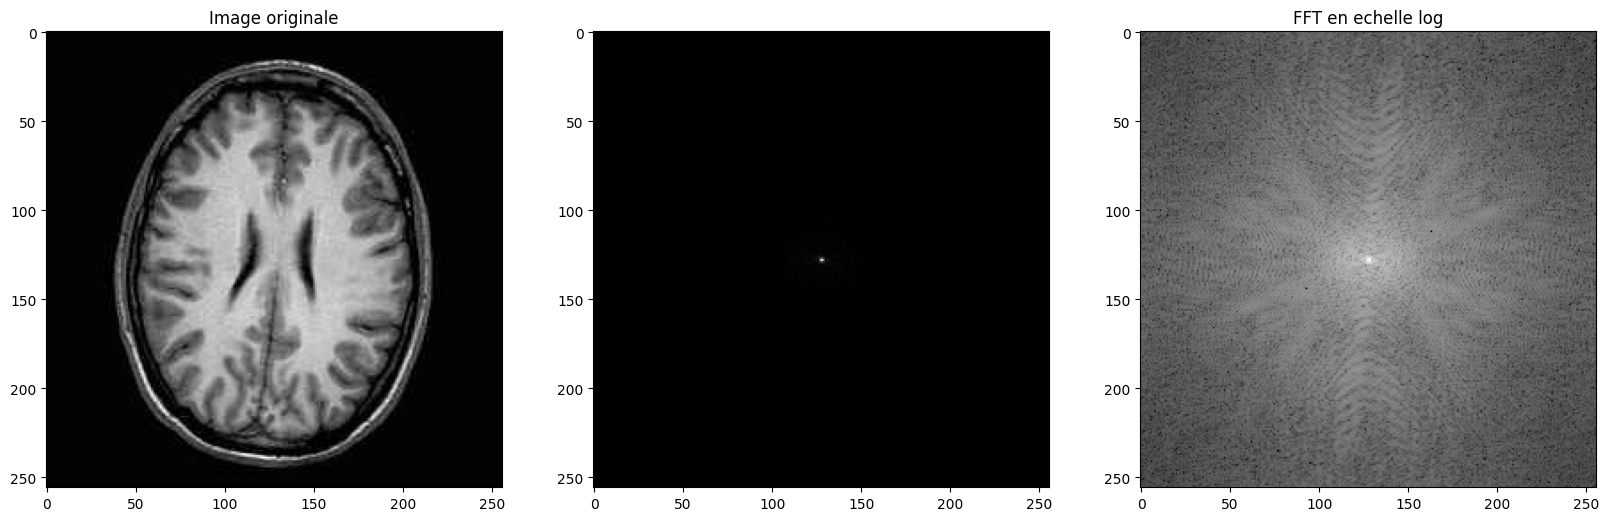

In [8]:
irm = plt.imread("irm_cerveau.JPG")

irm_ft,fft_irm = TF(irm)


plt.figure(figsize=(20,20))

plt.subplot(131)
plt.imshow(irm)
plt.title("Image originale")

plt.subplot(132)
plt.imshow(np.abs(irm_ft))

plt.subplot(133)
plt.imshow(fft_irm)
plt.title("FFT en echelle log")


2.  Réalisez un masque de valeur 1 de la taille de l'image, avec un carré de 51
    pixels de valeur nulle localisé au centre de l'image ; le masque supprimera
    alors à peine 4% du spectre.

In [9]:
masq = np.ones(np.shape(irm))
masq[128-25:128+26,128-25:128+26] = 0


In [10]:
tf_fil_irm = irm_ft*masq

Text(0.5, 1.0, 'Tf abs irm filtree')

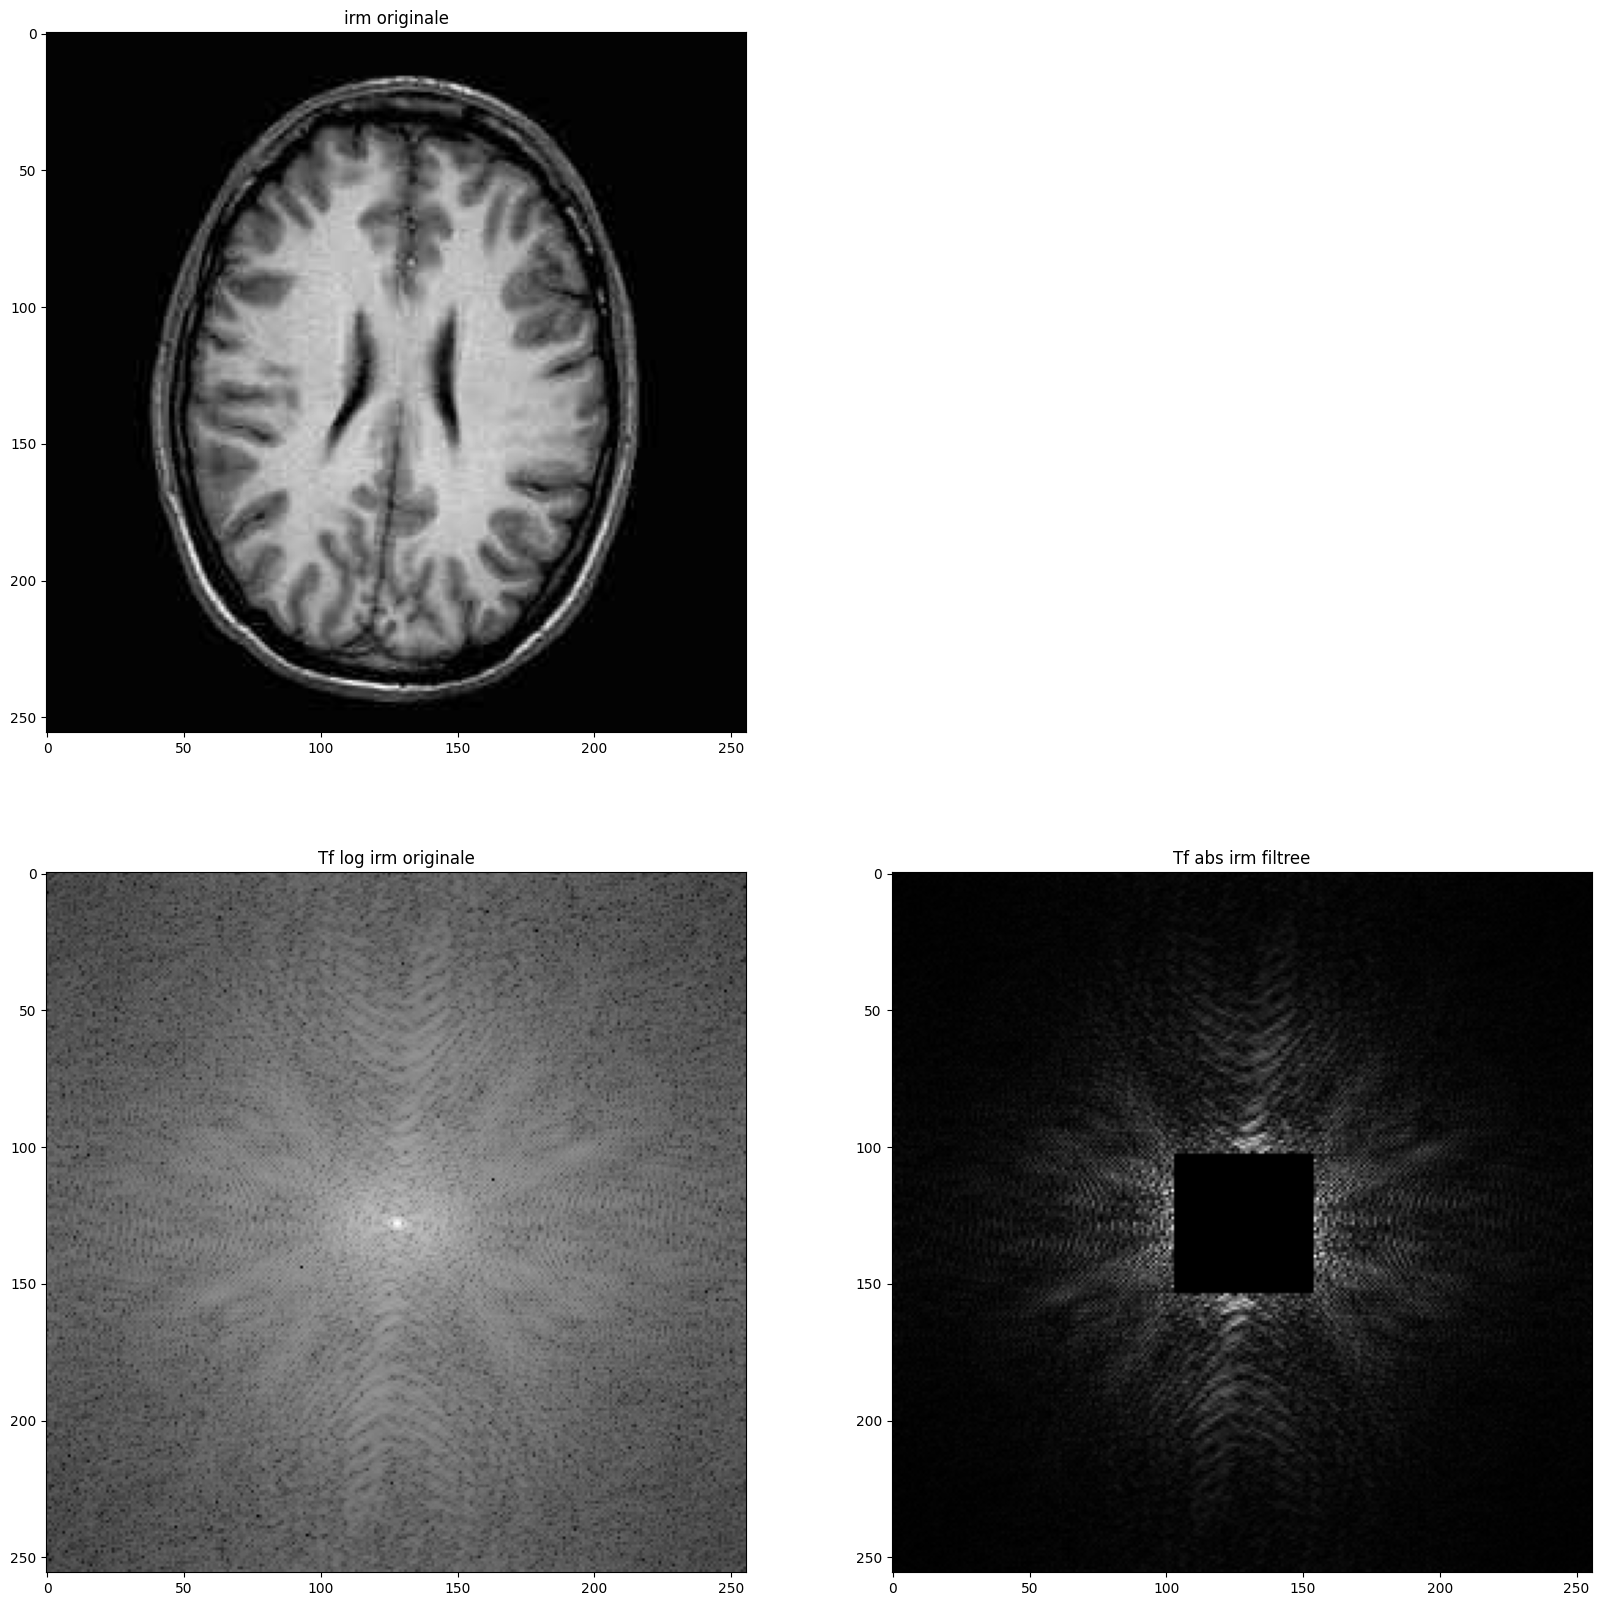

In [11]:
plt.figure(figsize=(20,20))

plt.subplot(221)
plt.imshow(irm)
plt.title("irm originale")

# plt.subplot(222)
# plt.imshow(irm_fil)
# plt.title("irm filtrée")

plt.subplot(223)
plt.imshow(fft_irm)
plt.title("Tf log irm originale")

plt.subplot(224)
plt.imshow(np.abs(tf_fil_irm))
plt.title("Tf abs irm filtree")

3.  À quoi va ressembler l'image correspondant à cette TF filtrée ? Le vérifier en
    calculant la TF inverse.

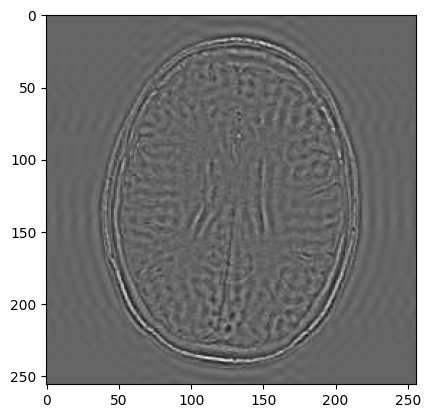

In [12]:
fft_inverse = np.fft.ifft2(np.fft.ifftshift(tf_fil_irm))


plt.imshow(np.real(fft_inverse))


# On a attenué les basses frequences // on aura detecté les contours.
# Le frquentiel n'est pas forcement lineaire

#on prend la partie reeele car l'image est reell, si on prend la valeur absolue, les valeurs negatives seront transformées en positives. 

4.  Recommencez la procédure en inversant le masque. Quel type d'image
    obtient-on ?

Text(0.5, 1.0, 'Tf abs irm filtree inverse')

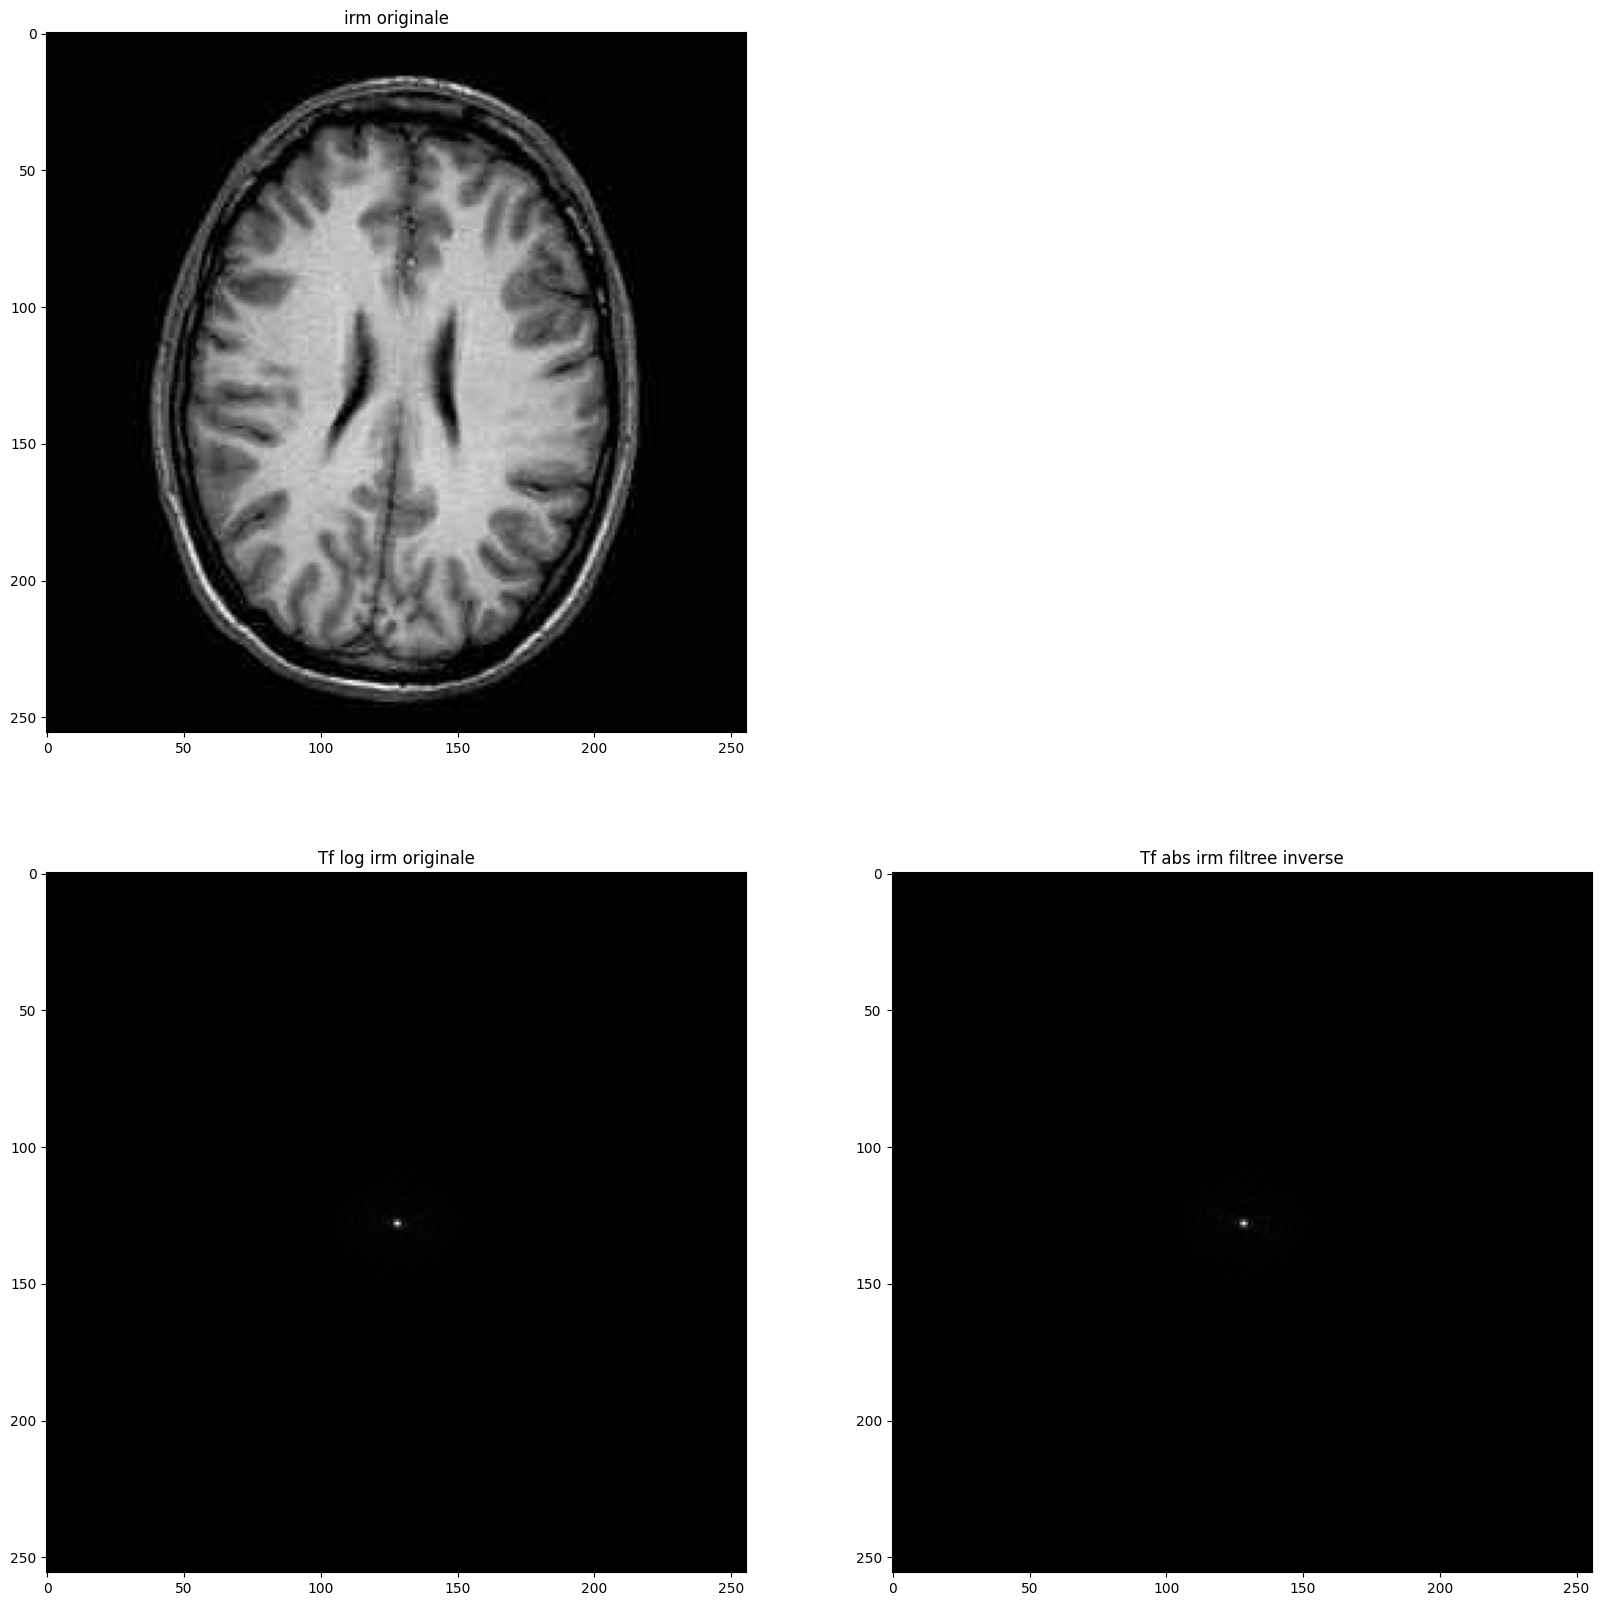

In [13]:
masqI=1-masq
tf_fil_inv_irm = irm_ft*masqI

plt.figure(figsize=(20,20))

plt.subplot(221)
plt.imshow(irm)
plt.title("irm originale")

# plt.subplot(222)
# plt.imshow(irm_fil)
# plt.title("irm filtrée")

plt.subplot(223)
plt.imshow(np.abs(irm_ft))
plt.title("Tf log irm originale")

plt.subplot(224)
plt.imshow(np.abs(tf_fil_inv_irm))
plt.title("Tf abs irm filtree inverse")





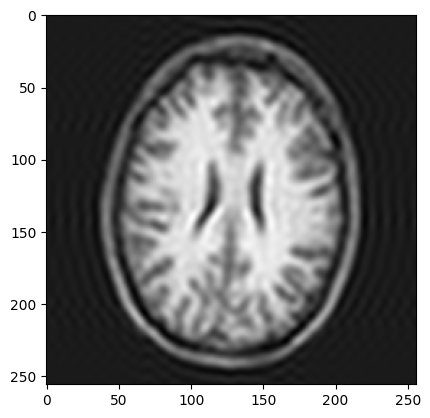

In [14]:
fft_inverse_2 = np.fft.ifft2(np.fft.ifftshift(tf_fil_inv_irm))


plt.imshow(np.real(fft_inverse_2))


# On a attenué les hautes frequences.


#On peut utilsier les deux methodes : Tf ou filtrage lineaire(convolution en reel) pour filtrer une image

5.  Chargez les images $beach\_nb$ et $manhattan\_nb$, et calculez leur
    TF.

Text(0.5, 1.0, 'Manhattan Tf log')

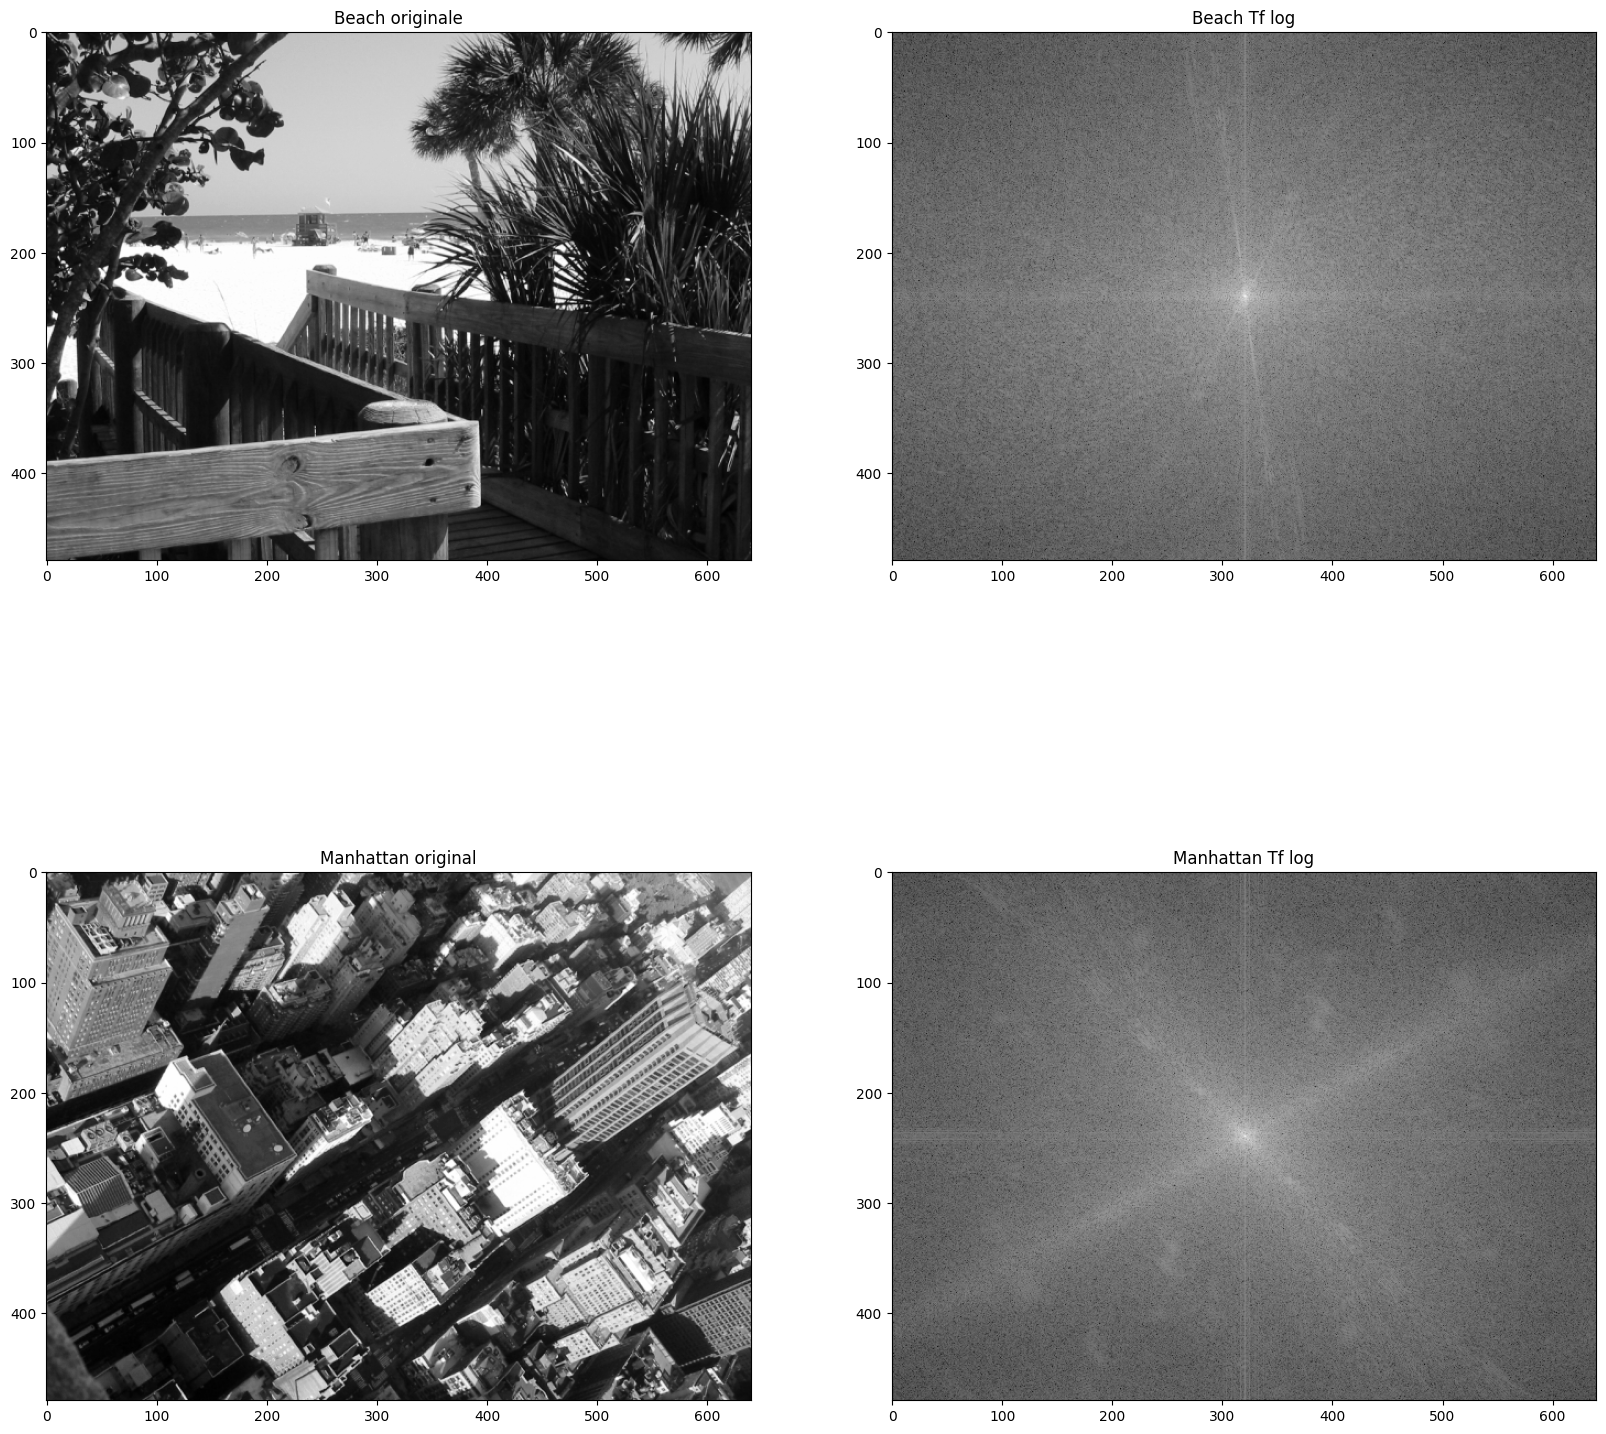

In [16]:
beach = plt.imread('beach_nb.tif')
manhattan = plt.imread('manhattan_nb.tif')

spectre_beach = np.fft.fftshift(np.fft.fft2(beach))
spectre_manhattan = np.fft.fftshift(np.fft.fft2(manhattan))

plt.subplot(2,2,1)
plt.imshow(beach)
plt.axis('off')
plt.title('Beach')

plt.subplot(2,2,2)
plt.imshow(np.log(np.abs(spectre_beach)))
plt.axis('off')
plt.title('Spectre Beach')

plt.subplot(2,2,3)
plt.imshow(manhattan)
plt.axis('off')
plt.title('Manhattan')

plt.subplot(2,2,4)
plt.imshow(np.log(np.abs(spectre_manhattan)))
plt.axis('off')
plt.title('Spectre Manhattan')

6.  Créez une TF composée du module de l'une de ces deux TFs, et de la
    phase de l'autre.

In [ ]:
module_beach = np.abs(spectre_beach)
phase_manhattan = np.angle(spectre_manhattan)
nouvelle_tf_mb_pm = module_beach * np.exp(1j * phase_manhattan)

module_manhattan = np.abs(spectre_manhattan)
phase_beach = np.angle(spectre_beach)
nouvelle_tf_mm_pb = module_manhattan * np.exp(1j * phase_beach)

plt.imshow(np.log(np.abs(nouvelle_tf_mb_pm)))
plt.axis('off')
plt.title('Nouvelle TF composée (module_beach et phase_manhattan)')
plt.show()

plt.imshow(np.log(np.abs(nouvelle_tf_mm_pb)))
plt.axis('off')
plt.title('Nouvelle TF composée (module_manhattan et phase_beach)')
plt.show()

7.  Calculez la TF inverse de cette nouvelle TF et interprétez.

In [ ]:
image_reconstruite_mb_pm = np.fft.ifft2(np.fft.ifftshift(nouvelle_tf_mb_pm)).real
image_reconstruite_mm_pb = np.fft.ifft2(np.fft.ifftshift(nouvelle_tf_mm_pb)).real

plt.imshow(image_reconstruite_mb_pm)
plt.axis('off')
plt.title('Image reconstruite (module_beach et phase_manhattan)')
plt.show()

plt.imshow(image_reconstruite_mm_pb)
plt.axis('off')
plt.title('Image reconstruite (module_manhattan et phase_beach)')
plt.show()